<a href="https://colab.research.google.com/github/doantronghieu/COMPUTER_VISION/blob/main/UDM_ZTM/MY_CODE/10_TIME_SERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
!wget https://raw.githubusercontent.com/tronghieu2810/DEEP-LEARNING/main/helper_DL.py
!pip install colorama
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':15})
import seaborn           as sns
sns.set()

--2022-04-11 08:40:48--  https://raw.githubusercontent.com/tronghieu2810/DEEP-LEARNING/main/helper_DL.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26763 (26K) [text/plain]
Saving to: ‘helper_DL.py’

helper_DL.py        100%[===================>]  26.14K  --.-KB/s    in 0.001s  

2022-04-11 08:40:49 (19.3 MB/s) - ‘helper_DL.py’ saved [26763/26763]



In [21]:
import helper_DL as helper
import csv
from datetime import datetime

from sklearn.model_selection import  train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.data as tfd
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers

# Downloading and inspecting our Bitcoin historical dataset

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-04-11 08:44:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-04-11 08:44:57 (7.49 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [7]:
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])

df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


# Visualizing our Bitcoin historical data with pandas

In [9]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)'])\
                   .rename(columns={'Closing Price (USD)': 'Price'})

bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


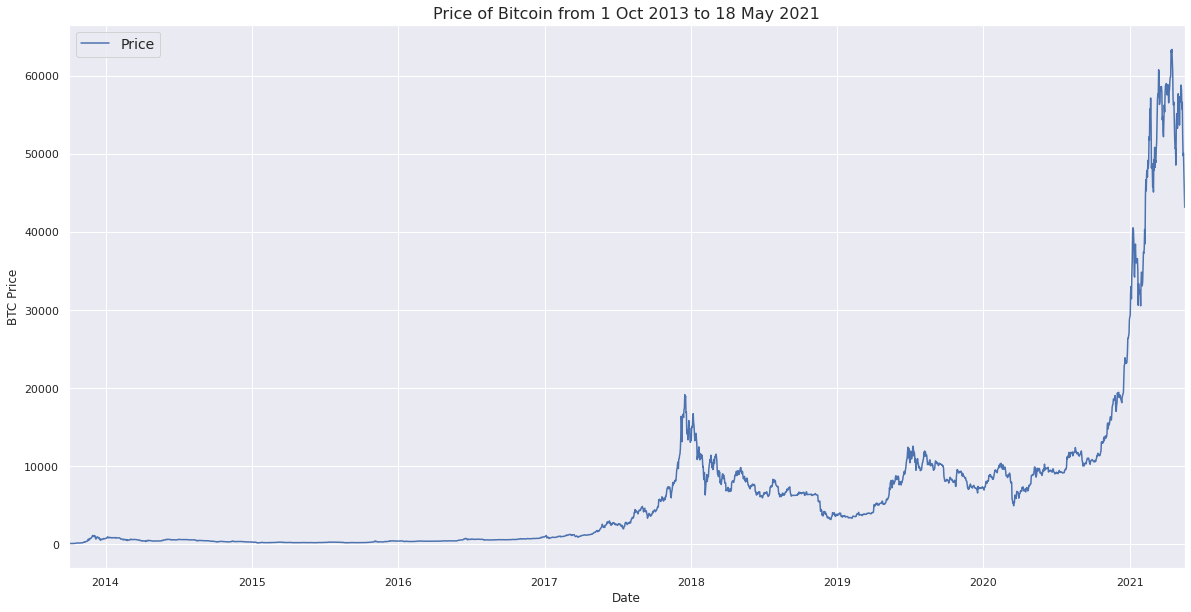

In [13]:
bitcoin_prices.plot(figsize=(20, 10))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.legend(fontsize=14);


# Reading in our Bitcoin data with Python's CSV module

In [16]:
timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
    csv_reader = csv.reader(f, delimiter=',')
    next(csv_reader)
    
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
        btc_price.append(float(line[2]))

print(f'{timesteps[:10]}\n')
print(f'{btc_price[:10]}')

[datetime.datetime(2013, 10, 1, 0, 0), datetime.datetime(2013, 10, 2, 0, 0), datetime.datetime(2013, 10, 3, 0, 0), datetime.datetime(2013, 10, 4, 0, 0), datetime.datetime(2013, 10, 5, 0, 0), datetime.datetime(2013, 10, 6, 0, 0), datetime.datetime(2013, 10, 7, 0, 0), datetime.datetime(2013, 10, 8, 0, 0), datetime.datetime(2013, 10, 9, 0, 0), datetime.datetime(2013, 10, 10, 0, 0)]

[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795, 123.033, 124.049, 125.96116]


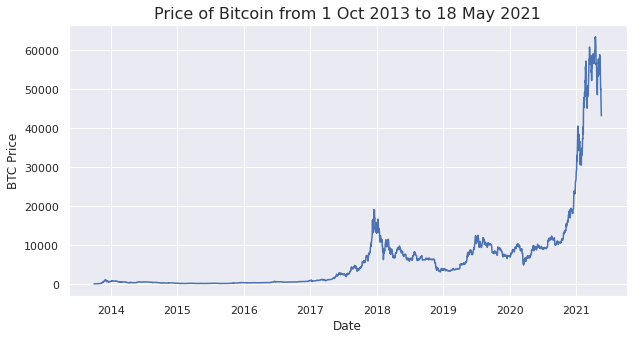

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.xlabel('Date')
plt.show()

# Creating train and test splits for time series (the wrong way)

In [20]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

print(f'{timesteps[:10]}\n')
print(f'{prices[:10]}\n')

['2013-10-01T00:00:00.000000000' '2013-10-02T00:00:00.000000000'
 '2013-10-03T00:00:00.000000000' '2013-10-04T00:00:00.000000000'
 '2013-10-05T00:00:00.000000000' '2013-10-06T00:00:00.000000000'
 '2013-10-07T00:00:00.000000000' '2013-10-08T00:00:00.000000000'
 '2013-10-09T00:00:00.000000000' '2013-10-10T00:00:00.000000000']

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
 123.033   124.049   125.96116]



In [23]:
X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

print(f'{X_train.shape} - {X_test.shape} - {y_train.shape} - {y_test.shape}')

(2229,) - (558,) - (2229,) - (558,)


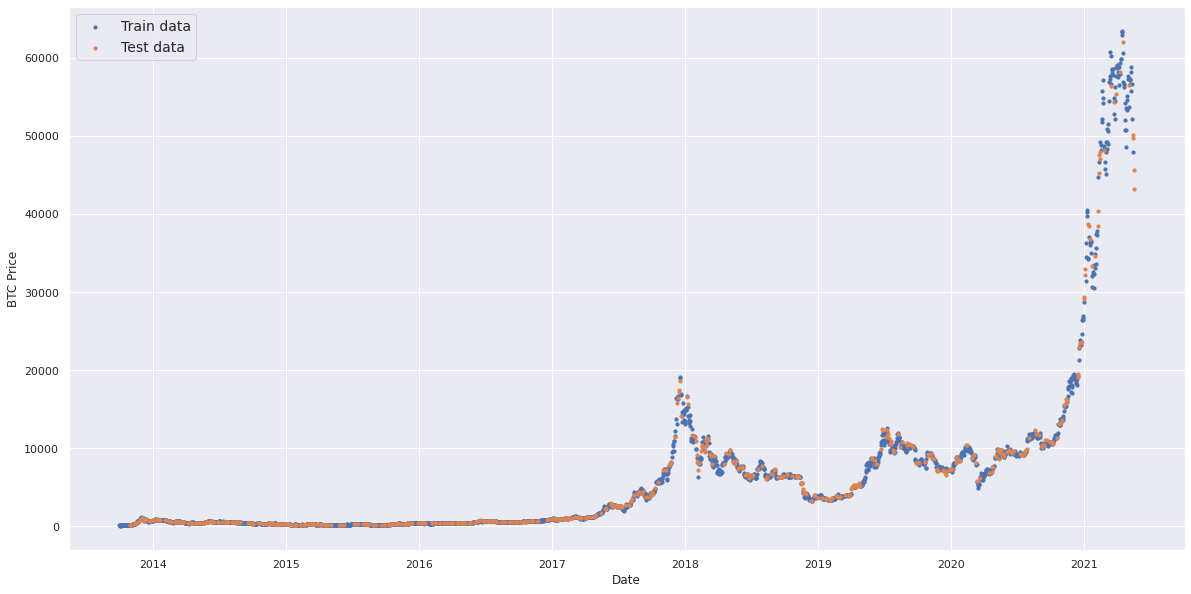

In [26]:
plt.figure(figsize=(20, 10))
plt.scatter(X_train, y_train, s=10, label='Train data')
plt.scatter(X_test, y_test, s=10, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show()

# Creating train and test splits for time series (the right way)

In [27]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

print(f'{len(X_train)} - {len(X_test)} - {len(y_train)} - {len(y_test)}')

2229 - 558 - 2229 - 558


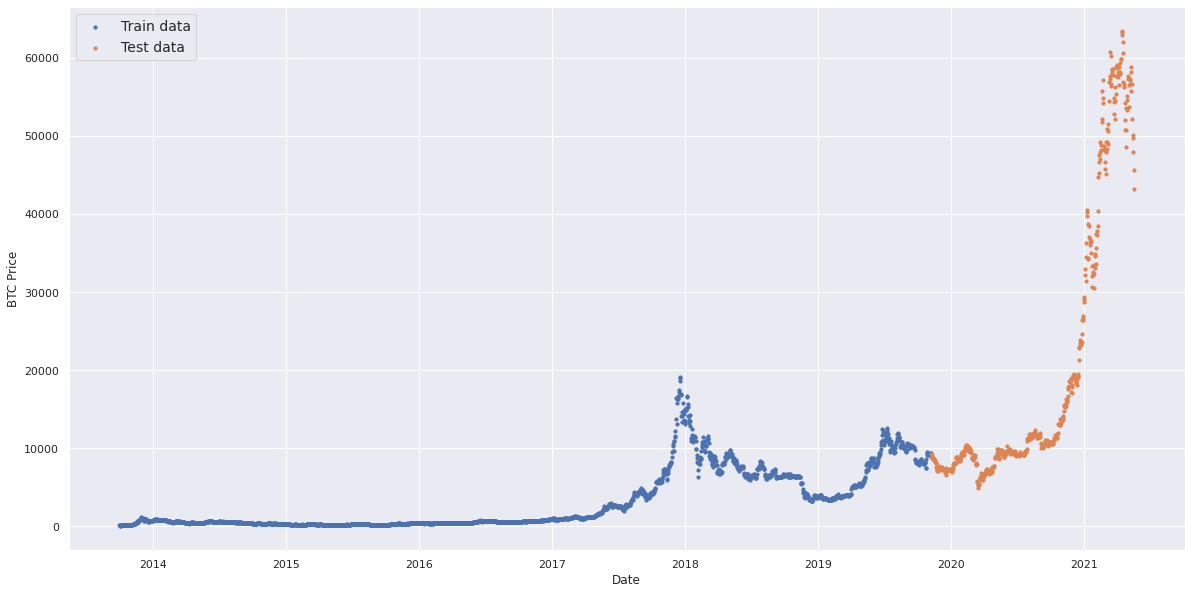

In [28]:
plt.figure(figsize=(20, 10))
plt.scatter(X_train, y_train, s=10, label='Train data')
plt.scatter(X_test, y_test, s=10, label='Test data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show()

# Creating a plotting function to visualize our time series data

In [34]:
def plot_time_series(timesteps, values, y_label, format='.',  
                     start=0, end=None, label=None):
    """
    Plots timesteps (a series of points in time) againts values (a series of
    values across timesteps)

    Parameters:
        timesteps: array of timestep values
        values: array of values across time
        format: style of plot, default '.'
        start: where to start the plot (setting the value will index from start
               of timestep)
        end: where to end the plot
        label: label to show on plot about values
    """
    
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel('Time')
    plt.ylabel(y_label)
    if label:
        plt.legend(fontsize=14)

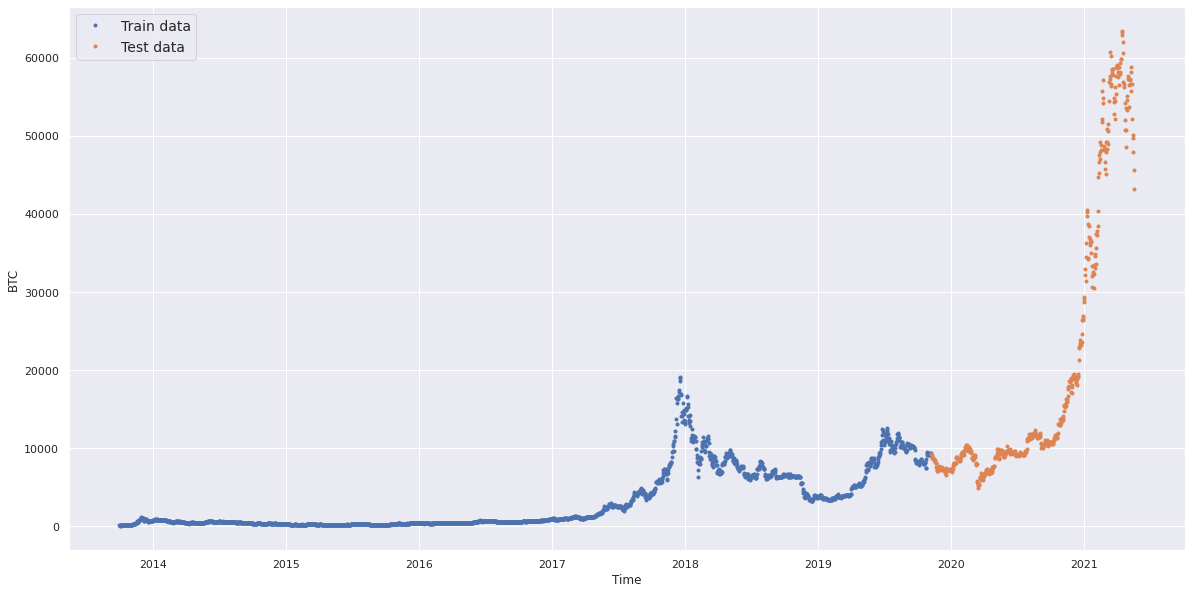

In [36]:
plt.figure(figsize=(20, 10))
plot_time_series(timesteps=X_train, values=y_train, y_label='BTC', format='.',  
                     start=0, end=None, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, y_label='BTC', format='.',  
                     start=0, end=None, label='Test data')

# Model 0: Making and visualizing a naive forecast model

In [37]:
naive_forecast = y_test[:-1]

print(f'{naive_forecast[:10]}\n')
print(f'{naive_forecast[-10:]}\n')

[9226.48582088 8794.35864452 8798.04205463 9081.18687849 8711.53433917
 8760.89271814 8749.52059102 8656.97092235 8500.64355816 8469.2608989 ]

[57107.12067189 58788.20967893 58102.19142623 55715.54665129
 56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361]



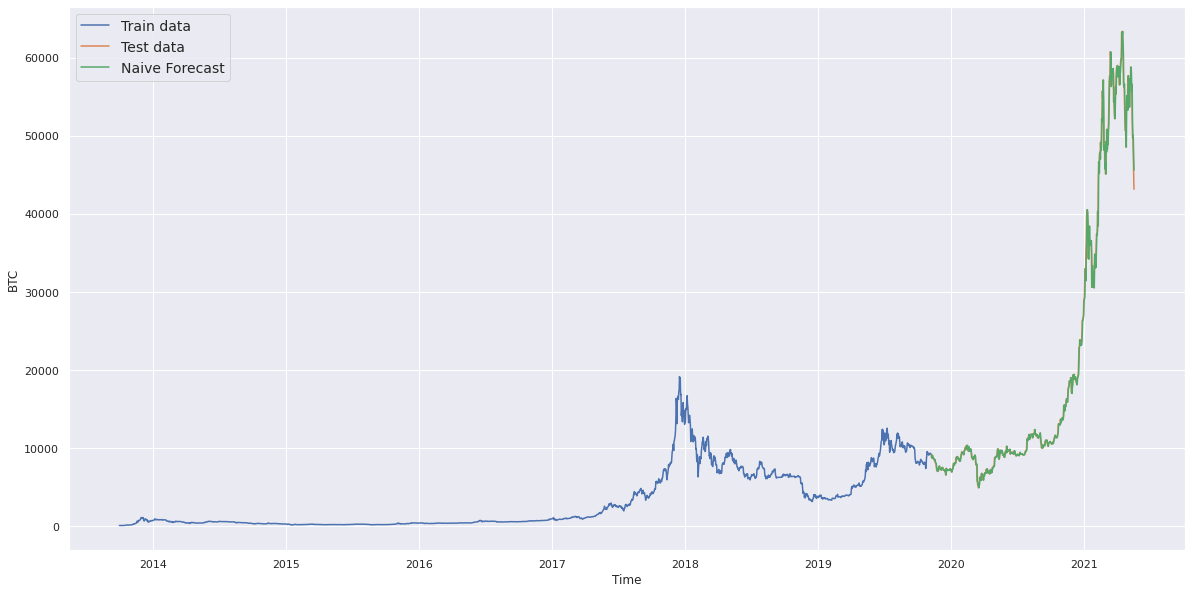

In [39]:
plt.figure(figsize=(20, 10))
plot_time_series(timesteps=X_train, values=y_train, y_label='BTC', format='-', 
                 start=0, end=None, label='Train data')
plot_time_series(timesteps=X_test, values=y_test, y_label='BTC', format='-', 
                 start=0, end=None, label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, y_label='BTC', format='-', 
                 start=0, end=None, label='Naive Forecast')

# Implementing MASE with TensorFlow

In [40]:
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

    return mae / mae_naive_no_season

In [41]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>